In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import *
import matplotlib.pyplot as plt
print(1)

1


In [3]:
def normalization(data):
    s = (data - data.min()) / (data.max() - data.min())
    return s
print(2)

2


In [4]:
def pretreatment(path, label):
    data = np.loadtxt(path)

    inputTrain = []
    inputTest = []

    for i in range(10):
        data_new = data[0 + i * 100:100000 + i * 100]
        data_new = data_new.reshape(100, 1000)

        np.random.shuffle(data_new)
        train = normalization(data_new[:70, :])
        test = normalization(data_new[70:, :])
        inputTrain.append(train)
        inputTest.append(test)

    inputTrain = np.array(inputTrain).reshape(-1, 1000)
    inputTest = np.array(inputTest).reshape(-1, 1000)
    labelTrain = np.array([label for i in range(0, 700)])
    labelTest = np.array([label for i in range(0, 300)])

    return inputTrain, labelTrain, inputTest, labelTest
print(3)

3


In [5]:
def stack_list(a, b, c, d, e, f, g, h):
    aa = np.vstack((a, e))
    bb = np.hstack((b, f))
    cc = np.vstack((c, g))
    dd = np.hstack((d, h))
    return aa, bb, cc, dd
print(4)

4


In [7]:
def dataset():
    '''
    0: 正常
    1：内圈0.007
    2：滚珠0.007
    3：外圈0.007
    4: 内圈0.014
    5: 滚珠0.014
    6: 外圈0.014
    7: 内圈0.021
    8: 滚珠0.021
    9: 外圈0.021

    '''
    inputTrain_1 = []
    labelTrain_1 = []
    inputTest_1 = []
    labelTest_1 = []
    inputTrain0, labelTrain0, inputTest0, labelTest0 = pretreatment('./dataFile/Normal.txt', 0)

    inputTrain1, labelTrain1, inputTest1, labelTest1 = pretreatment('./dataFile/IR07.txt', 1)
    inputTrain2, labelTrain2, inputTest2, labelTest2 = pretreatment('./dataFile/B07.txt', 2)
    inputTrain3, labelTrain3, inputTest3, labelTest3 = pretreatment('./dataFile/OR07.txt', 3)

    inputTrain4, labelTrain4, inputTest4, labelTest4 = pretreatment('./dataFile/IR14.txt', 4)
    inputTrain5, labelTrain5, inputTest5, labelTest5 = pretreatment('./dataFile/B14.txt', 5)
    inputTrain6, labelTrain6, inputTest6, labelTest6 = pretreatment('./dataFile/OR14.txt', 6)

    inputTrain7, labelTrain7, inputTest7, labelTest7 = pretreatment('./dataFile/IR21.txt', 7)
    inputTrain8, labelTrain8, inputTest8, labelTest8 = pretreatment('./dataFile/B21.txt', 8)
    inputTrain9, labelTrain9, inputTest9, labelTest9 = pretreatment('./dataFile/OR21.txt', 9)

    inputTrain_1.extend(
        [inputTrain0, inputTrain1, inputTrain2, inputTrain3, inputTrain4, inputTrain5, inputTrain6, inputTrain7, inputTrain8, inputTrain9])
    labelTrain_1.extend(
        [labelTrain0, labelTrain1, labelTrain2, labelTrain3, labelTrain4, labelTrain5, labelTrain6, labelTrain7, labelTrain8, labelTrain9])
    inputTest_1.extend([inputTest0, inputTest1, inputTest2, inputTest3, inputTest4, inputTest5, inputTest6, inputTest7, inputTest8, inputTest9])
    labelTest_1.extend([labelTest0, labelTest1, labelTest2, labelTest3, labelTest4, labelTest5, labelTest6, labelTest7, labelTest8, labelTest9])

    a, b, c, d = inputTrain_1[0], labelTrain_1[0], inputTest_1[0], labelTest_1[0]
    for i in range(1, 10, 1):
        a, b, c, d = stack_list(a, b, c, d, inputTrain_1[i], labelTrain_1[i], inputTest_1[i], labelTest_1[i])

    return a, b, c, d
print(5)

5


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 1000, 64)          1088      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 250, 64)           0         
_________________________________________________________________
re_lu_3 (ReLU)               (None, 250, 64)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 250, 128)          131200    
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 62, 128)           0         
_________________________________________________________________
re_lu_4 (ReLU)               (None, 62, 128)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 62, 256)          

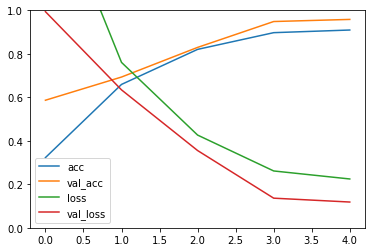

In [10]:
inputTrain,labelTrain,inputTest,labelTest=dataset()
inputTrain_=inputTrain.reshape(-1,1000,1)
inputTest_=inputTest.reshape(-1,1000,1)
labelTrain_=utils.to_categorical(labelTrain,num_classes=10)
labelTest_=utils.to_categorical(labelTest,num_classes=10)

CNN = keras.Sequential(
    [
        keras.layers.Input(shape=(1000, 1)),

        keras.layers.Conv1D(filters=64, kernel_size=16, strides=1, padding='SAME'), 
        keras.layers.MaxPooling1D(pool_size=4, strides=4), 
        keras.layers.ReLU(),  # 激活函数

        keras.layers.Conv1D(filters=128, kernel_size=16, strides=1, padding='SAME'), 
        keras.layers.MaxPooling1D(pool_size=4, strides=4),  
        keras.layers.ReLU(),  # 激活函数

        keras.layers.Conv1D(filters=256, kernel_size=16, strides=1, padding='SAME'),
        keras.layers.MaxPooling1D(pool_size=4, strides=4),  
        keras.layers.ReLU(),  # 激活函数

        keras.layers.Flatten(),  # 打平层

        keras.layers.Dense(1024, activation='relu'),  # 全连接层，1024个节点
        keras.layers.Dropout(0.5),
        keras.layers.Dense(512, activation='relu'),  # 全连接层，512个节点
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='softmax'),  # 全连接层，10个节

    ]
)

CNN.summary()


CNN.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.categorical_crossentropy,
    metrics=[keras.metrics.categorical_accuracy]
)

history=CNN.fit(inputTrain_,labelTrain_,batch_size=100,epochs=5,validation_data=(inputTest_,labelTest_))

pred=CNN.predict(inputTest_).argmax(axis=1)
acc=tf.reduce_mean(tf.cast(tf.equal(pred,labelTest),tf.float32))
print(acc)

loss=history.history['loss']
acc=history.history[ 'categorical_accuracy']
val_loss=history.history['val_loss']
val_acc=history.history['val_categorical_accuracy']

plt.plot(acc)
plt.plot(val_acc)
plt.plot(loss)
plt.plot(val_loss)
plt.ylim(0,1)
plt.legend(['acc','val_acc','loss','val_loss'])
plt.show()

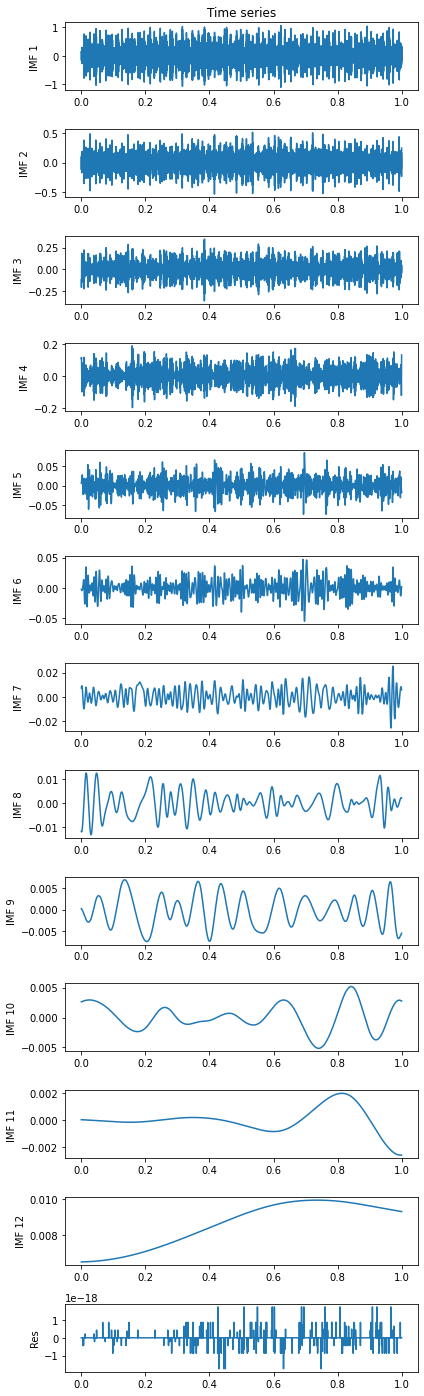

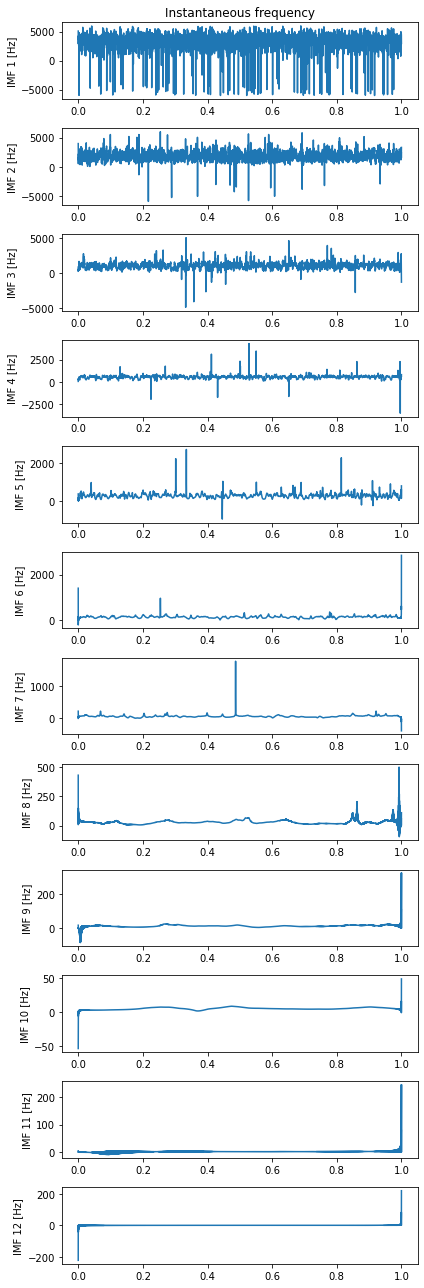

In [12]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import pywt
from PyEMD import *
import scipy.io as io
from mpl_toolkits.mplot3d import Axes3D

class bearing:
    da = {}
    de,fe,ba = [],[],[]
    sampling_rate = 0
    
    def __init__(self,ad,rate):    
        self.da = io.loadmat(str(ad)+'.mat')
        self.de = np.array([x[0] for x in self.da['X'+str(ad)+'_DE_time']])
        self.fe = np.array([x[0] for x in self.da['X'+str(ad)+'_FE_time']])
        self.ba = np.array([x[0] for x in self.da['X'+str(ad)+'_BA_time']])
        self.sampling_rate = rate
        return
    
    def STFT_img(self,data,name = 'hann'):
        #短时傅里叶变换
        f, t, zxx = signal.stft(data,fs = self.sampling_rate,window = 'hann',nperseg = 128,noverlap=127)
        plt.figure(figsize = (12, 4))
        plt.contourf(t,f, np.abs(zxx))
        plt.colorbar()
        plt.title('STFT Manitude' + '-' + name)
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        fig = plt.figure(figsize=(12, 9))
        axes3d = Axes3D(fig)
        print(t.shape,f.shape,zxx.shape)
        T,F=np.meshgrid(t,f)
        print(F.shape,T.shape,zxx.shape)
        axes3d.plot_surface(F,T, np.abs(zxx))
        axes3d.set_xlabel('Frequency [Hz]')
        axes3d.set_ylabel('Time [sec]')
        axes3d.set_zlabel('STFT')
        return 
    
    def CWT_img(self,data,name = 'morl',wavename = 'morl'):
        #连续小波分析
        '''墨西哥帽小波"mexh"
        Morlet小波"morl"
        复数Morlet小波（"cmorB-C"浮点值B，C）
        高斯小波（"gausP"其中P是1到8之间的整数）
        复数高斯小波（"cgauP"其中P是1到8之间的整数）
        香农小波（"shanB-C"具有浮点值B和C）哪里 B 是带宽和 C 是中心频率。
        频率B样条小波（"fpspM-B-C"具有整数M和浮点B，C）
        M  是样条顺序， B 是带宽和 C 是中心频率。
        '''
        T = 1.0 / self.sampling_rate
        #采样周期
        t = np.arange(0, len(data) * T, T)
        fc = pywt.central_frequency(wavename)
        #中心频率
        totalscal = 20
        #小波尺度
        cparam = 2 * fc * totalscal
        #计算小波尺度
        scales = cparam / np.arange(totalscal, 0, -1)
        [cwtmatr, frequencies] = pywt.cwt(data, scales, wavename, T)
        plt.figure(figsize = (12, 4))
        plt.plot(t, data)
        plt.figure(figsize = (12, 4))
        plt.contourf(t, frequencies, abs(cwtmatr))
        plt.colorbar()
        plt.title('CWT Manitude' + '-' + name)
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        return
    
    def CYWT_img(self,data,wavelet,maxlevel = 3):
        #小波包分析
        plt.rcParams['font.sans-serif'] = ['Simhei']
        #正常显示中文字体
        plt.rcParams['axes.unicode_minus'] = False
        #显示正负号
        energy = []
        wp = pywt.WaveletPacket(data = data,wavelet = wavelet,mode = 'symmetric',maxlevel = maxlevel)
        freqTree = [node.path for node in wp.get_level(maxlevel,'freq')]
        freqBand = self.sampling_rate / (2 ** maxlevel)

        fig,axes = plt.subplots(len(freqTree) + 1,1,figsize = (10,7))
        axes[0].plot(data)
        axes[0].set_title('原始数据')

        for i in range(len(freqTree)):
            axes[i + 1].plot(wp[freqTree[i]].reconstruct(update = True))
            axes[i + 1].set_title('S'+str(i + 1),y = 0.15,x = 1.02)
            energy.append(pow(np.linalg.norm(wp[freqTree[i]].data,ord=None),2))
        plt.figure(figsize = (12,4))
        plt.bar(np.arange(2 ** maxlevel),energy)
        plt.xlabel('频带段')
        plt.ylabel('振动能量')
        return
    
    def EMD_img(self,data):
        #EMD分析
        T = 1.0 / self.sampling_rate  # 采样周期
        t = np.arange(0, len(data) * T, T)
        emd = EMD()
        emd.emd(data, t)
        # 提取IMF，与残差
        IMFs,res=emd.get_imfs_and_residue()
        # 绘制IMF
        vis1 = Visualisation()
        vis1.plot_imfs(imfs=IMFs,residue=res,t=t,include_residue=True)
        # 绘制并显示所提供IMF的瞬时频率
        vis2 = Visualisation()
        vis2.plot_instant_freq(t,imfs=IMFs)
    
'''b100 = io.loadmat('100.mat')
de_100 = np.array([x[0] for x in b100['X100_DE_time']])
b212 = bearing(212,12000)
b212.STFT_img(b212.de[:1200])
b212.CYWT_img(b212.de[:1200*8],'db1')
b212.CYWT_img(de_100[:1200*8],'db1')
b212.CWT_img(b212.de)
b212.CWT_img(b212.de[:1200])
b212.EMD_img(b212.de[:12000])
'''
b106 = bearing(106,12000)
#b106.CYWT_img(b106.de,'db1')
#b106.CYWT_img(b106.de[:1200*8],'db1')
b106.EMD_img(b106.de[:12000])